# MultiLinear Regression

#### Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and
#### make a table containing R^2 value for each prepared model.

## Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [2]:
Startup_Data=pd.read_csv("C:\\ExcelR\\Assignments\\Multilinear Reg\\50_Startups.csv", encoding="unicode_escape")
Startup_Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Data Understanding

#### R&D Spend           :  Research and devolop spend in the past few years
#### Administration      : spend on administration in the past few years
#### Marketing Spend   : spend on Marketing in the past few years
#### State                       :  states from which data is collected
#### Profit                      : profit of each state in the past few years

In [3]:
Startup_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### No null entries found.

In [4]:
Startup_Data["State"].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

## Preprocessing

In [5]:
from sklearn.preprocessing import LabelEncoder
Le= LabelEncoder()

In [6]:
Startup_Data["State"]=Le.fit_transform(Startup_Data["State"])

In [7]:
Startup_Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


In [8]:
Le.classes_

array(['California', 'Florida', 'New York'], dtype=object)

In [9]:
Startup_Data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [10]:
Startup_Data.columns=['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit']

## Correlation Analysis

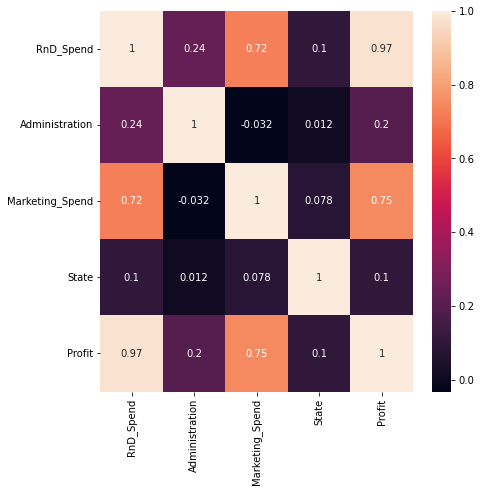

In [11]:
Corr_Matrix=Startup_Data.corr()
plt.figure(figsize=[7,7])
sns.heatmap(Corr_Matrix, annot=True)
plt.show()

## Performaing Assumptions Check

### 1. Linearity check

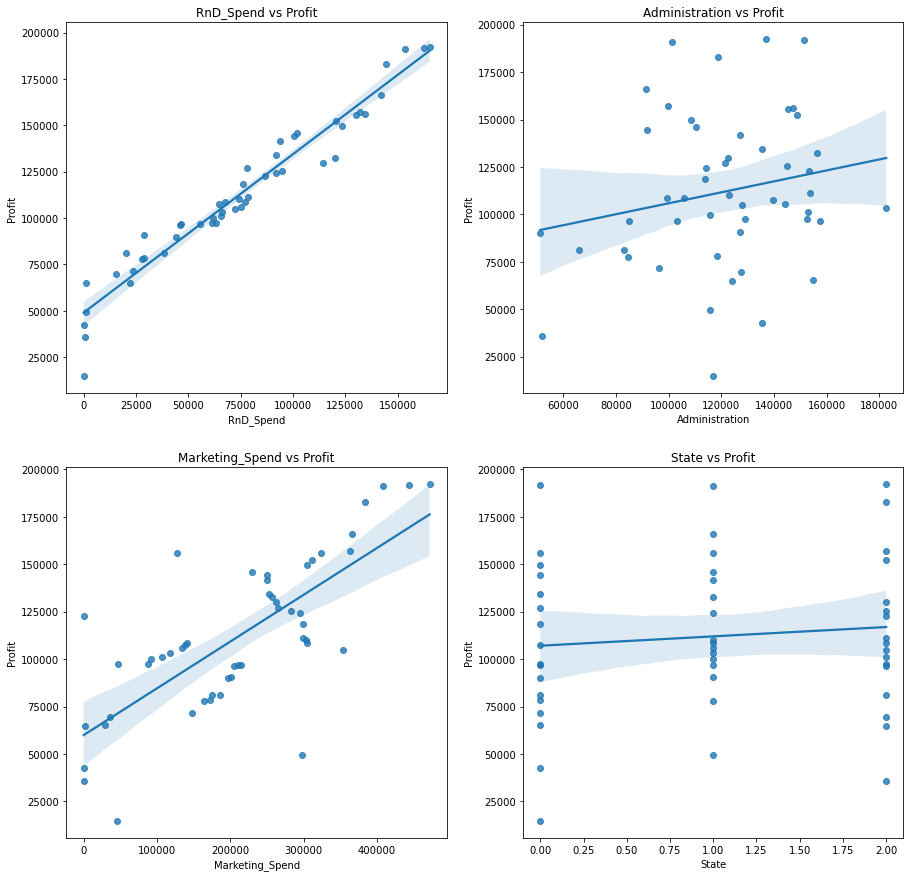

In [12]:
Linearity_fig,Axes=plt.subplots(2,2)

Linearity_fig.set_figheight(15)
Linearity_fig.set_figwidth(15)

sns.regplot(x="RnD_Spend",y="Profit",data=Startup_Data,ax=Axes[0,0])
Axes[0,0].set_title("RnD_Spend vs Profit")

sns.regplot(x="Administration",y="Profit",data=Startup_Data,ax=Axes[0,1])
Axes[0,1].set_title("Administration vs Profit")

sns.regplot(x="Marketing_Spend",y="Profit",data=Startup_Data,ax=Axes[1,0])
Axes[1,0].set_title("Marketing_Spend vs Profit")

sns.regplot(x="State",y="Profit",data=Startup_Data,ax=Axes[1,1])
Axes[1,1].set_title("State vs Profit")

plt.show()

#### Linarity check for the feature RnD passed
#### Other features failed the Linearity check

### 2. Normality Check

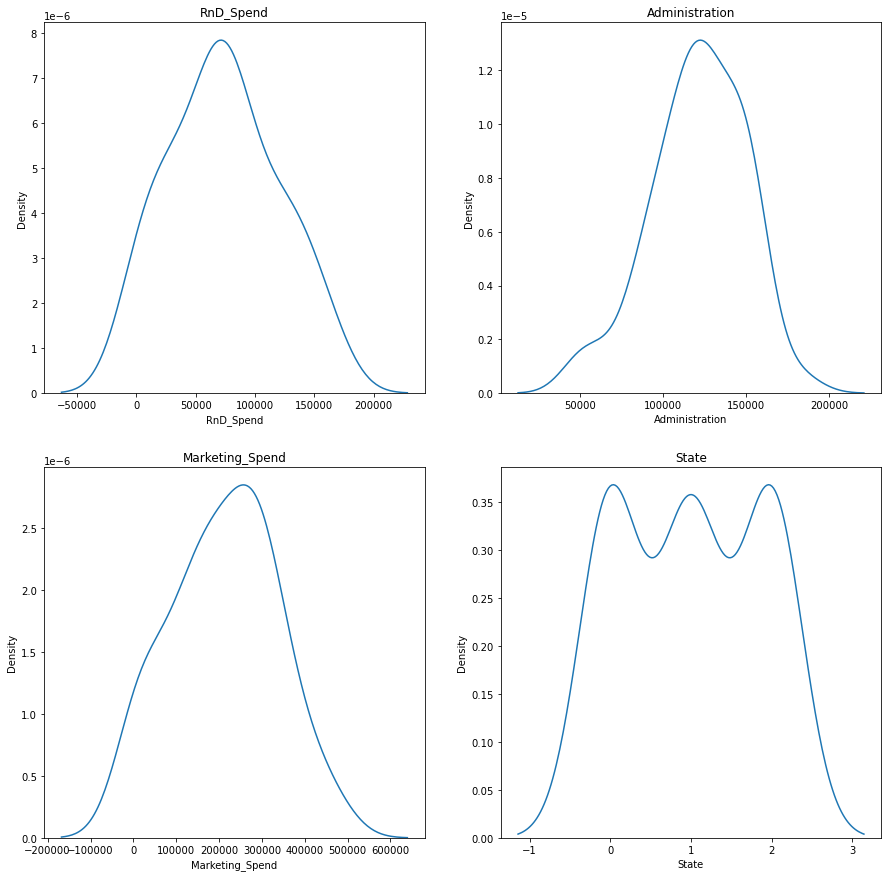

In [13]:
Normality_fig,Axes2=plt.subplots(2,2)

Normality_fig.set_figheight(15)
Normality_fig.set_figwidth(15)

sns.kdeplot(x="RnD_Spend",data=Startup_Data,ax=Axes2[0,0])
Axes2[0,0].set_title("RnD_Spend")

sns.kdeplot(x="Administration",data=Startup_Data,ax=Axes2[0,1])
Axes2[0,1].set_title("Administration")

sns.kdeplot(x="Marketing_Spend",data=Startup_Data,ax=Axes2[1,0])
Axes2[1,0].set_title("Marketing_Spend")

sns.kdeplot(x="State",data=Startup_Data,ax=Axes2[1,1])
Axes2[1,1].set_title("State")

plt.show()

#### The features Rnd_Spend, Marketing_spend, Administration attained bell shaped curve.
#### These three features are moderately similar to normal distribution.

### 3. Multicollinearity check

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

y=Startup_Data.drop("Profit",axis=1)

Vif_data = pd.DataFrame()
Vif_data["Features"] = y.columns
Vif_data["VIF"] = [variance_inflation_factor(y.values, i) for i in range(len(y.columns))]
Vif_data

,Features,VIF
0,RnD_Spend,8.386322
1,Administration,4.815916
2,Marketing_Spend,7.674608
3,State,2.382637


#### Vif values of all features are less than 10.

#### 4. No Auto Regression(No inputs are showing timedate format. So it passed.)

## Model Building

In [15]:
X=Startup_Data.drop("Profit",axis=1)
y=Startup_Data[["Profit"]]

In [16]:
import statsmodels.formula.api as smf
Linear_Stats_Model= smf.ols(formula="Profit~RnD_Spend+Administration+Marketing_Spend+State",data=Startup_Data).fit()

## Model Testing

In [23]:
pd.DataFrame(Linear_Stats_Model.predict(X.head()))

,0
0,192502.764416
1,189182.666045
2,182150.958419
3,173677.490618
4,172142.800630


## Model Evaluation

In [18]:
Linear_Stats_Model.rsquared

0.9507462044842656

In [19]:
Evaluation_Data=Startup_Data.copy()
Evaluation_Data["Predicted_y"]=Linear_Stats_Model.predict(X).round(1)
Evaluation_Data["Error"]=Evaluation_Data["Predicted_y"]-Evaluation_Data["Profit"]
Evaluation_Data.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit,Predicted_y,Error
0,165349.20,136897.80,471784.10,2,192261.83,192502.8,240.97
1,162597.70,151377.59,443898.53,0,191792.06,189182.7,-2609.36
2,153441.51,101145.55,407934.54,1,191050.39,182151.0,-8899.39
3,144372.41,118671.85,383199.62,2,182901.99,173677.5,-9224.49
4,142107.34,91391.77,366168.42,1,166187.94,172142.8,5954.86


In [20]:
Linear_Stats_Model.params

Intercept          50142.506443
RnD_Spend              0.805760
Administration        -0.026826
Marketing_Spend        0.027228
State                -22.320577
dtype: float64

## Scaling

In [25]:
from sklearn.preprocessing import StandardScaler
Std_Scaler=StandardScaler()
Scaled_Data=Startup_Data.copy()
Scaled_Data["Predicted_y"]=Linear_Stats_Model.predict(X).round(1)
Scaled_Data=pd.DataFrame(Std_Scaler.fit_transform(Scaled_Data),columns=['RnD_Spend', 'Administration', 'Marketing_Spend', 'State', 'Profit',"Predicted_y"])
Scaled_Data["Error"]=Scaled_Data["Predicted_y"]-Scaled_Data["Profit"]
Scaled_Data.head()

,RnD_Spend,Administration,Marketing_Spend,State,Profit,Predicted_y,Error
0,2.016411,0.560753,2.153943,1.212678,2.011203,2.068835,0.057631
1,1.955860,1.082807,1.923600,-1.212678,1.999430,1.983498,-0.015932
2,1.754364,-0.728257,1.626528,0.000000,1.980842,1.802763,-0.178080
3,1.554784,-0.096365,1.422210,1.212678,1.776627,1.584969,-0.191658
4,1.504937,-1.079919,1.281528,0.000000,1.357740,1.545522,0.187782


### Homoscadasticity Check

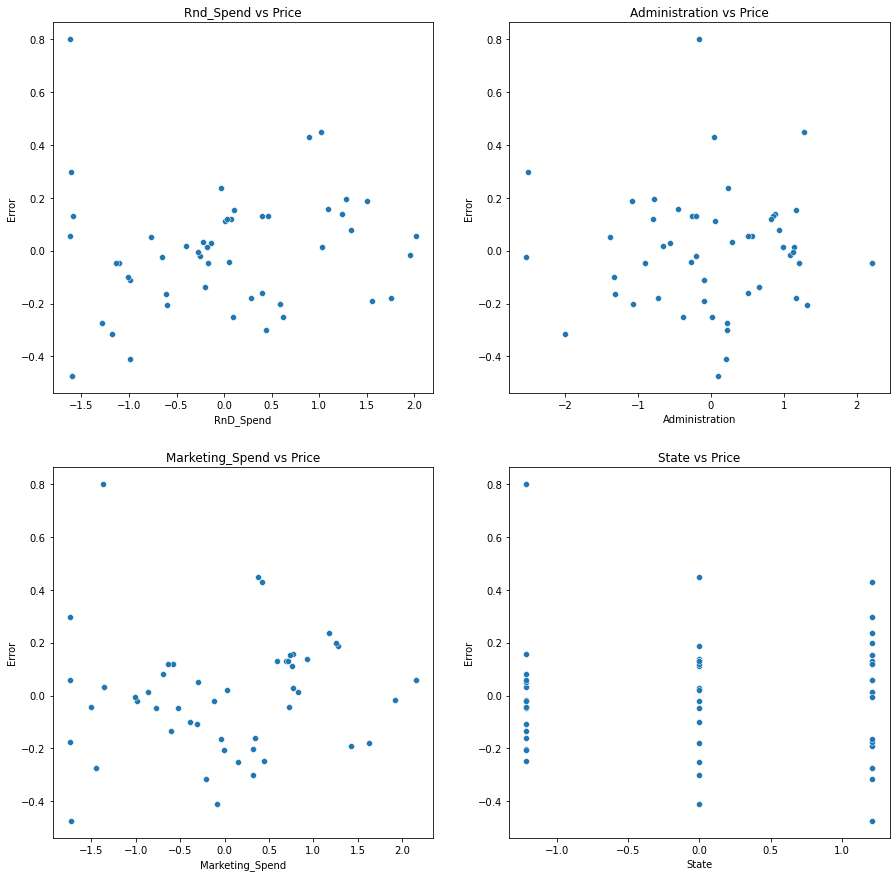

<Figure size 1080x1080 with 0 Axes>

In [26]:
H_fig,axes3=plt.subplots(2,2)
plt.figure(figsize=[15,15])

H_fig.set_figheight(15)
H_fig.set_figwidth(15)

sns.scatterplot(x="RnD_Spend", y="Error", data=Scaled_Data,ax=axes3[0,0])
axes3[0,0].set_title("Rnd_Spend vs Price")

sns.scatterplot(x="Administration", y="Error", data=Scaled_Data,ax=axes3[0,1])
axes3[0,1].set_title("Administration vs Price")

sns.scatterplot(x="Marketing_Spend", y="Error", data=Scaled_Data,ax=axes3[1,0])
axes3[1,0].set_title("Marketing_Spend vs Price")

sns.scatterplot(x="State", y="Error", data=Scaled_Data,ax=axes3[1,1])
axes3[1,1].set_title("State vs Price")

plt.show()

#### Homoscadasticity check failed.

### Residual Mean across fitted line

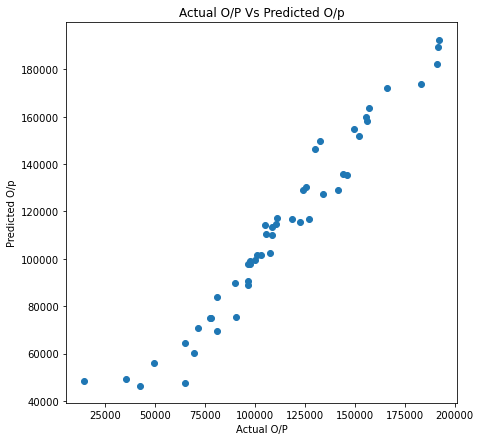

In [29]:
plt.figure(figsize=(7,7))
plt.scatter(x=Evaluation_Data["Profit"],y=Evaluation_Data["Predicted_y"])
plt.title('Actual O/P Vs Predicted O/p')
plt.xlabel('Actual O/P')
plt.ylabel('Predicted O/p')
plt.show()

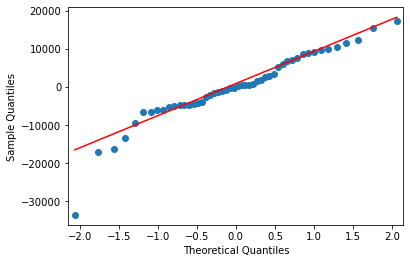

In [31]:
import statsmodels.api as sm
sm.qqplot(Linear_Stats_Model.resid,line='q')
plt.show()

## Model Optimization

In [33]:
Optimization_Data=Startup_Data.copy()

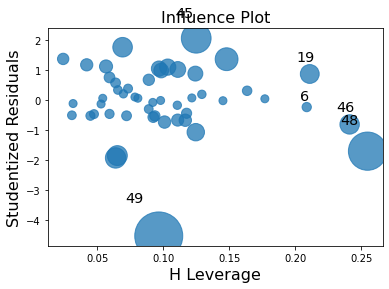

In [32]:
sm.graphics.influence_plot(Linear_Stats_Model)
plt.show()

In [34]:
# Dropping high leverage points

Optimization_Data=Optimization_Data.drop(index=[49])

Linear_Stats_Model_Inf=smf.ols(formula="Profit~RnD_Spend+Administration+Marketing_Spend+State", data=Optimization_Data).fit()
print("The R2 Value of Linear_Stats_Model_Inf is:",Linear_Stats_Model_Inf.rsquared)
Optimization_Data.shape

The R2 Value of Linear_Stats_Model_Inf is: 0.9617575114723105


(49, 5)

### Optimization by Transformation

In [74]:
import numpy as np
 
print("The R2 Value of untransformed Data Model is      :",Linear_Stats_Model.rsquared)

Linear_Stats_Model_sqrt=smf.ols(formula="Profit~np.sqrt(RnD_Spend)+np.sqrt(Administration)+np.sqrt(Marketing_Spend)+np.sqrt(State)", data=Startup_Data).fit()
print("The R2 Value of Linear_Stats_Model_sqrt is       :",Linear_Stats_Model_sqrt.rsquared)

Linear_Stats_Model_cbrt=smf.ols(formula="Profit~np.cbrt(RnD_Spend)+np.cbrt(Administration)+np.cbrt(Marketing_Spend)+np.cbrt(State)", data=Startup_Data).fit()
print("The R2 Value of Linear_Stats_Model_cbrt is       :",Linear_Stats_Model_cbrt.rsquared)

Linear_Stats_Model_Adm_Cbrt=smf.ols(formula="Profit~RnD_Spend+np.cbrt(Administration)+Marketing_Spend+State", data=Startup_Data).fit()
print("The R2 Value of Linear_Stats_Model_Adm_Cbrt is   :",Linear_Stats_Model_Adm_Cbrt.rsquared)

Linear_Stats_Model_Mar_Cbrt=smf.ols(formula="Profit~(RnD_Spend)+(Administration)+np.cbrt(Marketing_Spend)+(State)", data=Startup_Data).fit()
print("The R2 Value of Linear_Stats_Model_Mar_Cbrt is   :",Linear_Stats_Model_Mar_Cbrt.rsquared)

Linear_Stats_Model_State_Cbrt=smf.ols(formula="Profit~(RnD_Spend)+(Administration)+(Marketing_Spend)+np.cbrt(State)", data=Startup_Data).fit()
print("The R2 Value of Linear_Stats_Model_State_Cbrt is :",Linear_Stats_Model_State_Cbrt.rsquared)

Linear_Stats_Model_RnD_Cbrt=smf.ols(formula="Profit~np.cbrt(RnD_Spend)+(Administration)+(Marketing_Spend)+(State)", data=Startup_Data).fit()
print("The R2 Value of Linear_Stats_Model_RnD_Cbrt is   :",Linear_Stats_Model_RnD_Cbrt.rsquared)

Linear_Stats_Model_RnD_3_Features=smf.ols(formula="Profit~(RnD_Spend)+(Marketing_Spend)+(State)", data=Startup_Data).fit()
print("The R2 Value of Linear_Stats_Model_RnD_3_Features is   :",Linear_Stats_Model_RnD_3_Features.rsquared)

The R2 Value of untransformed Data Model is      : 0.9507462044842656
The R2 Value of Linear_Stats_Model_sqrt is       : 0.9080869151935147
The R2 Value of Linear_Stats_Model_cbrt is       : 0.835949299542259
The R2 Value of Linear_Stats_Model_Adm_Cbrt is   : 0.9506682386291156
The R2 Value of Linear_Stats_Model_Mar_Cbrt is   : 0.9502933505095937
The R2 Value of Linear_Stats_Model_State_Cbrt is : 0.9507461119076062
The R2 Value of Linear_Stats_Model_RnD_Cbrt is   : 0.8737496054904088
The R2 Value of Linear_Stats_Model_RnD_3_Features is   : 0.9504503504444918


## Model Selection

In [69]:
R2_Values_Df=pd.DataFrame()
R2_Values_Df["Model_Name"]=["Linear_Stats_Model","Linear_Stats_Model_sqrt","Linear_Stats_Model_cbrt","Linear_Stats_Model_Adm_Cbrt","Linear_Stats_Model_Mar_Cbrt","Linear_Stats_Model_State_Cbrt","Linear_Stats_Model_RnD_Cbrt","Linear_Stats_Model_Inf"]
R2_Values_Df["R2-Scores"]=[Linear_Stats_Model.rsquared,Linear_Stats_Model_sqrt.rsquared,Linear_Stats_Model_cbrt.rsquared,Linear_Stats_Model_Adm_Cbrt.rsquared,Linear_Stats_Model_Mar_Cbrt.rsquared,Linear_Stats_Model_State_Cbrt.rsquared,Linear_Stats_Model_RnD_Cbrt.rsquared,Linear_Stats_Model_Inf.rsquared]
R2_Values_Df

,Model_Name,R2-Scores
0,Linear_Stats_Model,0.950746
1,Linear_Stats_Model_sqrt,0.908087
2,Linear_Stats_Model_cbrt,0.835949
3,Linear_Stats_Model_Adm_Cbrt,0.950668
4,Linear_Stats_Model_Mar_Cbrt,0.950293
5,Linear_Stats_Model_State_Cbrt,0.950746
6,Linear_Stats_Model_RnD_Cbrt,0.873750
7,Linear_Stats_Model_Inf,0.961758


### Linear_Stats_Model_inf has the best r2 score.

In [72]:
Linear_Stats_Model_Inf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.6
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           1.45e-30
Time:                        01:25:04   Log-Likelihood:                -506.00
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.332e+04   5726.740      9.311      0.000    4.18e+04    6.49e+04
RnD_Spend           0.7844      0.039     20.367      0.000       0.707       0.862
Administration     -0.0225      0.043     -0.522      0.604      -0.109       0.064
Marketing_Spend     0.0252      0.014      1.811      0.077      -0.003       0.053
State            -969.6140   1360.800     -0.713      0.480   -3712.127    1772.899
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.215
Skew:                           0.042   Prob(JB):                        0.898
Kurtosis:                       2.686   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Eventhough, Linear_Stats_Model_inf has the best r2 score. It is obtained by removing the datapoint with high influence on the regression.


### Considering the total number of observations(50) into account, the next best model which is the base model is chosen for deployment.

In [71]:
Linear_Stats_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           8.51e-29
Time:                        01:24:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RnD_Spend           0.8058      0.046     17.609      0.000       0.714       0.898
Administration     -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing_Spend     0.0272      0.017      1.637      0.109      -0.006       0.061
State             -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model Deployment

In [75]:
from pickle import dump,load
dump(Linear_Stats_Model,open('Intel_On_Profit.pkl','wb'))

In [76]:
Loaded_Int=load(open('Intel_On_Profit.pkl','rb'))
Loaded_Int.predict(X.head())

0    192502.764416
1    189182.666045
2    182150.958419
3    173677.490618
4    172142.800630
dtype: float64